**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 신경망 구조

## 퍼셉트론

인공신경망의 한 종류


다수의 입력($x_1, x_2, ..., x_n$)과 가중치($w_1, w_2, ..., w_n$)를 곱하여 그 값에 편향(bias)을 더한다.


해당 값이 어느 임계치 값($\theta$)을 초과하면 활성화 함수를 통과한 출력값을 내보낸다.

![perceptron](https://miro.medium.com/max/1400/1*ofVdu6L3BDbHyt1Ro8w07Q.png)

출처: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a

## 뉴런의 수학적 표현

인풋값에 각 가중치를 적용한 후 더한다. $\rightarrow \sum_{i} w_{i}x_{i}$

- 두 벡터의 내적으로 구할 수 있다.

편향 $b$를 더해준다. $\rightarrow \sum_{i} w_{i}x_{i} + b$

- 편향(bias)는 결정 경계선을 원점에서부터 벗어나게 해준다.


- 따로 표현이 없어도 기본적으로 존재한다고 생각하면 된다.

활성화 함수 $f$를 적용한다. $\rightarrow f(\sum_{i} w_{i}x_{i} + b)$

- 임계값($\theta$)을 경계로 출력이 바뀐다.

최종 아웃풋: $y = f(\sum_{i} w_{i}x_{i} + b)$

![](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

출처: https://cs231n.github.io/convolutional-networks/

## 완전 연결 계층(Fully-Connected Layer) 수학적 표현

가중치 행렬: $W = [w_0, w_1,\ ..., \ w_{M-1}]^T$, $M \times N$ 행렬로 각각의 $w_k$는 $N \times 1$ 형태의 벡터이다.

편향 벡터: $b = [b_0, b_1, \ ..., \ b_{M-1}]$  

아웃풋 벡터: $y = f(Wx + b)$

![](https://miro.medium.com/max/620/1*ZBYO3waYUyPsLm0rb15sEQ.png)

출처: https://towardsdatascience.com/the-sparse-future-of-deep-learning-bce05e8e094a

## 논리회로

컴퓨터는 0과 1의 두 가지 값을 입력해 하나의 값을 출력하는 회로가 모여 만들어진다.

이 회로를 게이트(Gate)라고 한다.

**논리 게이트(Logic Gates)**

- AND: 두 입력이 모두 1일 때 1을 출력하는 논리회로


- OR: 두 입력 중 하나라도 1이면 1을 출력하는 논리회로


- NOT: 입력이 1이면 0, 입력이 0이면 1을 출력하는 논리회로


- NAND: AND와 반대로 두 입력이 모두 1일 때 0을 출력하는 논리회로


- NOR: OR과 반대로 두 입력 중 하나라도 1이면 0을 출력하는 논리회로

**다이어그램과 진리표**

![](http://www.schoolphysics.co.uk/age14-16/Electronics/text/Logic_gates/images/1.png)

출처: http://www.schoolphysics.co.uk/age14-16/Electronics/text/Logic_gates/index.html

### AND 게이트

- 두 입력이 모두 1일 때 1을 출력하는 논리회로   

![](https://www.tutorialspoint.com/computer_logical_organization/images/and_logic.jpg)

- 진리표

![](https://www.tutorialspoint.com/computer_logical_organization/images/and_truthtable.jpg)

출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm

**AND 게이트를 만족시키는 가중치와 편향 구하기**

In [3]:
# AND 게이트
def AND(a,b):
    # 수학식 적용
    input = np.array([a,b])
    weights = np.array([0.4, 0.4])
    bias = -0.6
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1
    
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


- 두 입력이 모두 1일 때 1을 출력하는 AND 게이트를 생성하였다.

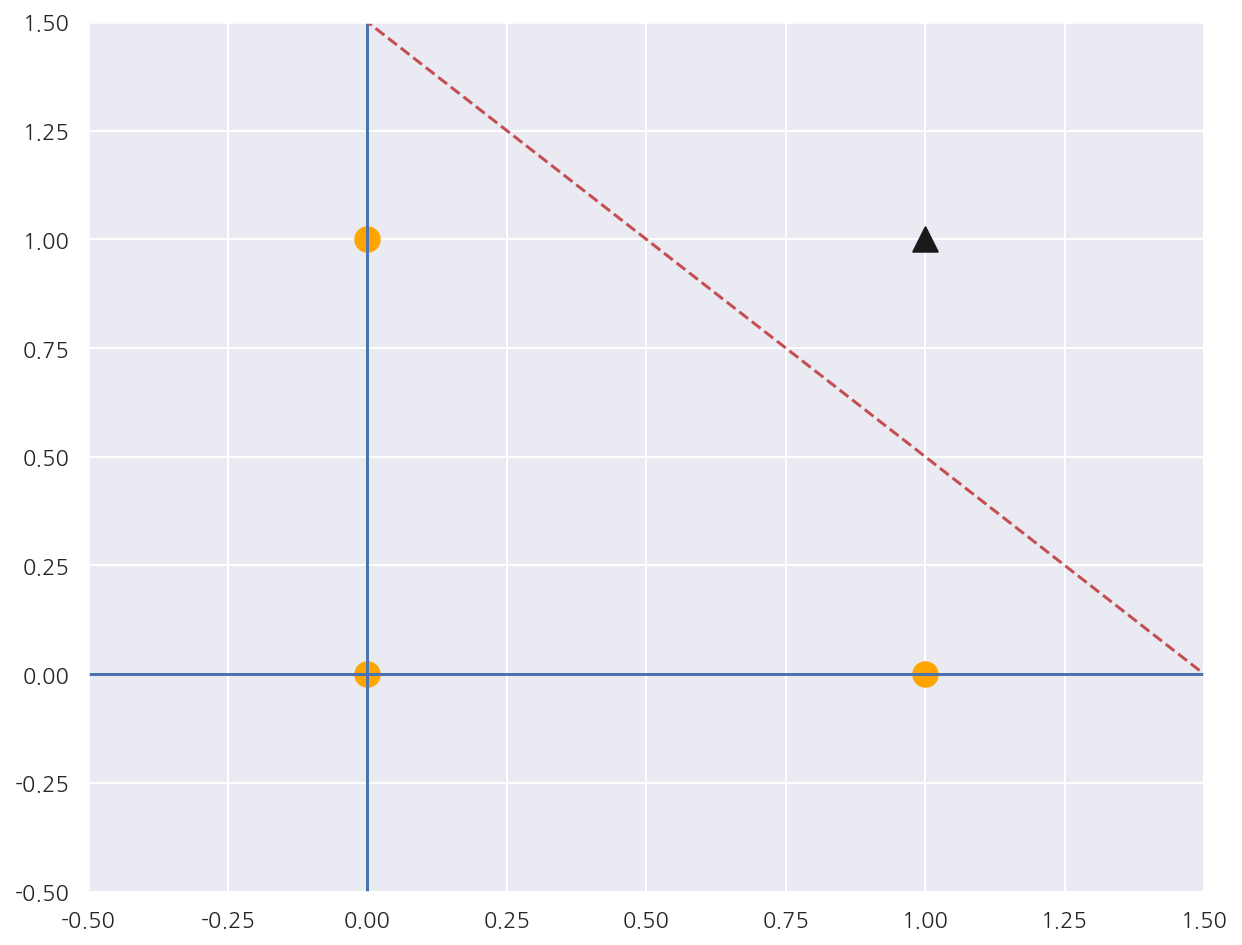

In [4]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = -0.6

# 앞선 함수에서 value가 0인 직선
y = (-0.4 * x1 - bias) / 0.4

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1,y,"r--")

plt.scatter(0,0, color="orange", marker="o", s= 150)
plt.scatter(0,1, color="orange", marker="o", s= 150)
plt.scatter(1,0, color="orange", marker="o", s= 150)
plt.scatter(1,1, color="k", marker="^", s= 150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.show()

- 앞서 생성한 수학식이 0인 직선을 빨간 점선으로 표시하였다.


- 빨간 점선 아래는 0이 출력되며 위의 영역은 1이 출력된다.

### OR 게이트

- 두 입력 중 하나라도 1이면 1을 출력하는 논리회로  
  
![](https://www.tutorialspoint.com/computer_logical_organization/images/or_logic.jpg)

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/or_truthtable.jpg)

출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm

**OR 게이트를 만족시키는 가중치와 편향 구하기**

In [5]:
# OR 게이트
def OR(a,b):
    # 수학식 적용
    input = np.array([a,b])
    weights = np.array([0.4, 0.5])
    bias = -0.3
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1
    
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


- 두 입력 중 하나라도 1이면 1을 출력하는 OR 게이트를 생성하였다.

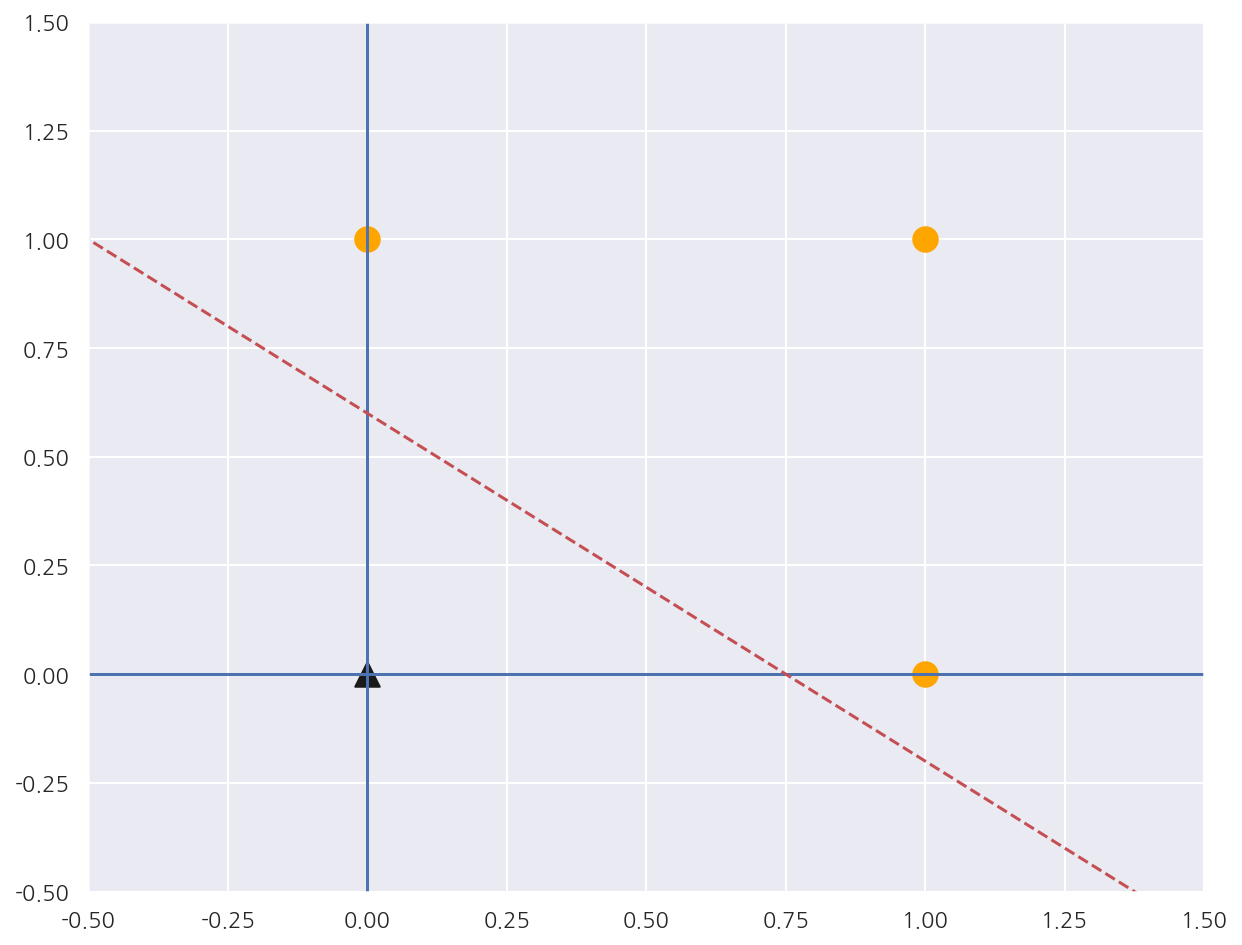

In [6]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = -0.3

# 앞선 함수에서 value가 0인 직선
y = (-0.4 * x1 - bias) / 0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1,y,"r--")

plt.scatter(0,0, color="k", marker="^", s= 150)
plt.scatter(0,1, color="orange", marker="o", s= 150)
plt.scatter(1,0, color="orange", marker="o", s= 150)
plt.scatter(1,1, color="orange", marker="o", s= 150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.show()

- 앞서 생성한 수학식이 0인 직선을 빨간 점선으로 표시하였다.


- 빨간 점선 아래는 0이 출력되며 위의 영역은 1이 출력된다.

### NAND 게이트

- 두 입력이 모두 1일 때 0을 출력하는 논리회로

![](https://www.tutorialspoint.com/computer_logical_organization/images/nand_logic.jpg)

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/nand_truthtable.jpg)

출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm

**NAND 게이트를 만족시키는 가중치와 편향 구하기**

In [7]:
# NAND 게이트
def NAND(a,b):
    # 수학식 적용
    input = np.array([a,b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input * weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1
    
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


- 두 입력이 모두 1일 때 0을 출력하는 NAND 게이트를 생성하였다.

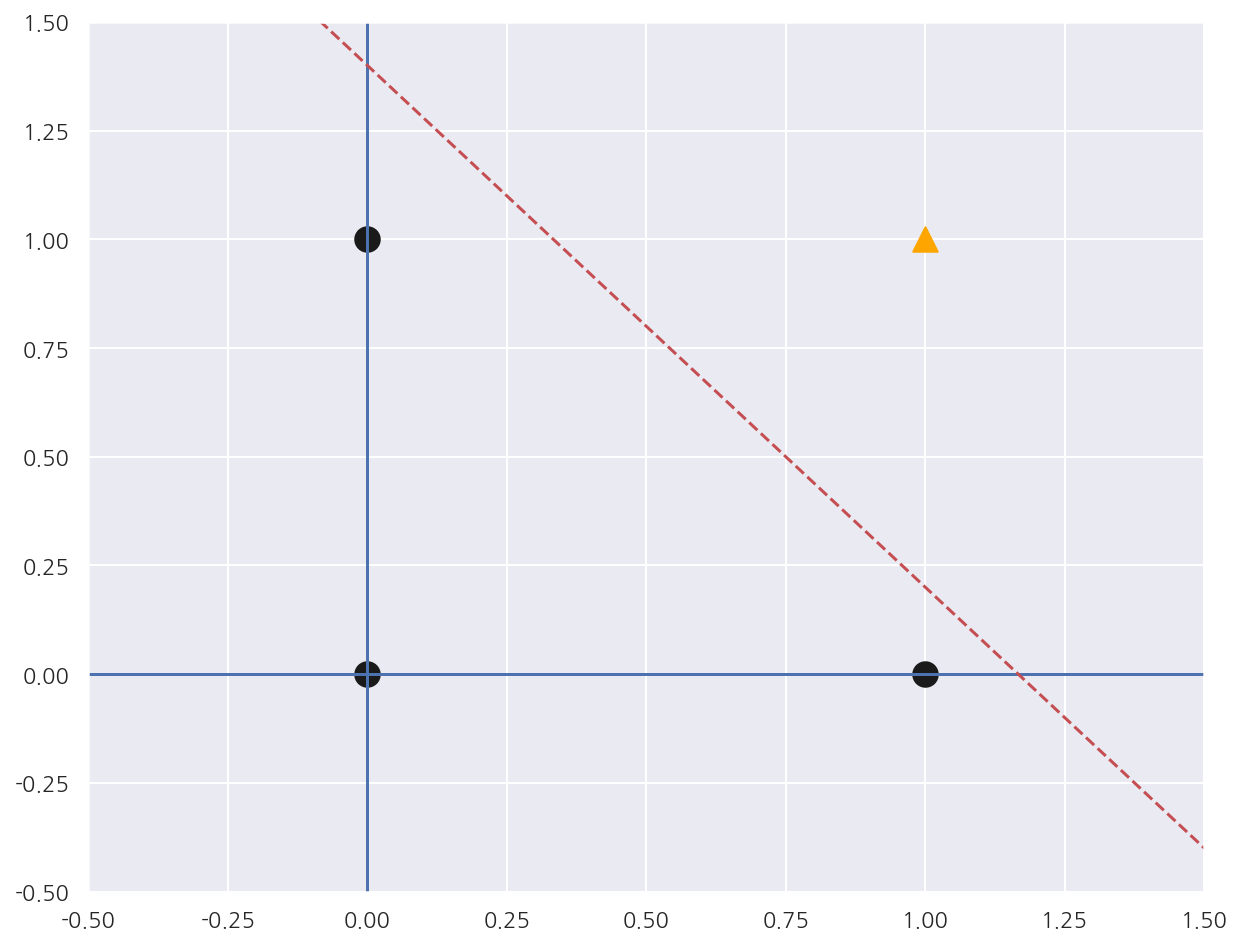

In [8]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = -0.7

# 앞선 함수에서 value가 0인 직선
y = (-0.6 * x1 - bias) / 0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1,y,"r--")

plt.scatter(0,0, color="k", marker="o", s= 150)
plt.scatter(0,1, color="k", marker="o", s= 150)
plt.scatter(1,0, color="k", marker="o", s= 150)
plt.scatter(1,1, color="orange", marker="^", s= 150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.show()

- 앞서 생성한 수학식이 0인 직선을 빨간 점선으로 표시하였다.


- 빨간 점선 아래는 1이 출력되며 위의 영역은 0이 출력된다.

### XOR 게이트

AND, NAND와 같은 선형문제는 퍼셉트론으로 해결 가능하지만, XOR은 직선(선형) 하나로는 해결 불가능하다.

XOR 문제로 인공지능은 첫 번째 겨울을 맞이했다고 한다.

![](http://ecee.colorado.edu/~ecen4831/lectures/xor2.gif)

출처: http://ecee.colorado.edu/~ecen4831/lectures/NNet3.html

## 다층 퍼셉트론(Multi Layer Perceptron, MLP)

XOR 문제는 추후 다층 퍼셉트론으로 해결되었다.

즉, 다층 퍼셉트론으로 비선형 문제를 해결할 수 있게 되었다.

AND, NAND, OR 게이트를 조합하면 XOR 문제를 해결할 수 있다.

![](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)

출처: https://commons.wikimedia.org/wiki/File:MultiLayerNeuralNetworkBigger_english.png

### 다층 퍼셉트론의 구성

다층 퍼셉트론은 기존 입력층과 출력층 사이의 은닉층을 추가한 구성이다.

- 입력층(input layer)


- 은닉층(hidden layer)


- 출력층(output layer)  

은닉층은 1개 이상 존재하며, 보통 5개 이상 존재하면 Deep Neural Network라고 칭한다.

수식으론 다음과 같이 표현할 수 있다.

- input layer -> hidden layer: $z = f_L(W_Lx + b_L)$


- hidden layer -> output layer: $y = a_K(W_Kz + b_K)$

![](https://www.researchgate.net/profile/Sandip_Lahiri/publication/26614896/figure/fig1/AS:310007494135809@1450922954279/A-schematic-diagram-of-artificial-neural-network-and-architecture-of-the-feed-forward.png)

출처: https://www.researchgate.net/figure/A-schematic-diagram-of-artificial-neural-network-and-architecture-of-the-feed-forward_fig1_26614896

### XOR 게이트

- 서로 다른 두 값이 입력으로 들어가면 1을 반환

![](https://www.tutorialspoint.com/computer_logical_organization/images/xor_logic.jpg)

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/xor_truthtable.jpg)

출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm

**XOR 게이트 만들기**

In [9]:
# XOR 게이트
def XOR(x1,x2):
    # NAND 연산과 OR 연산 결과를 AND연산으로 실행
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    
    return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


- NAND 게이트와 OR 게이트의 결과에 AND 게이트를 적용하여 XOR 게이트를 생성하였다.


- 여기서 NAND, OR 게이트가 hidden layer라고 보면 될 것 같다.

## 활성화 함수(Activation Function)

활성화 함수는 입력 신호의 총합을 출력 신호로 변환하는 함수이다.

활성화 함수에 따라 출력값이 결정되며 단층, 다층 퍼셉트론 모두 사용한다.

하나의 layer에서 다음 layer로 넘어갈 때는 항상 활성화 함수를 통과한다.

대표적인 활성화 함수는 다음과 같다.

- Sigmoid


- ReLU


- tanh 


- Identity Function


- Softmax

[[참고] 여러가지 활성화 함수](https://en.wikipedia.org/wiki/Activation_function)

### Step Function(계단 함수)

$
y = \begin{cases}
0 \quad (x < 0) \\
1 \quad (x \ge 0)
\end{cases}
$

![](https://www.intmath.com/laplace-transformation/svg/svgphp-unit-step-functions-definition-1a-s1.svg)

출처: https://www.intmath.com/laplace-transformation/1a-unit-step-functions-definition.php

In [10]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [11]:
def step_function_for_numpy(x):
    y = x >0
    
    return y.astype(np.int)

In [12]:
print(step_function(-3))
print(step_function(5))

a = np.array([5, 3, -4, 2.0])
print(step_function_for_numpy(a))

0
1
[1 1 0 1]


### Sigmoid Function(시그모이드 함수)

이진분류(binary classification)에 주로 사용하며 마지막 출력층의 활성화 함수로 사용한다.

출력값은 0~1 의 값이며, 이는 **확률**로 표현 가능하다.

$y = \dfrac{1}{1 + e^{-x}}$

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
print(sigmoid(3))
print(sigmoid(-3))

0.9525741268224334
0.04742587317756678


### 시그모이드 함수와 계단 함수 비교

공통점
  
- 출력값이 0~1 내의 범위


- 입력값의 정도에 따라 출력값의 정도가 달라진다.


- 즉, 입력이 중요하면(입력값이 크면) 큰 값을 출력한다.
    
차이점  
 
- 계단 함수에 비해 시그모이드 함수는 입력에 따라 출력이 연속적으로 변화한다.


- 또한 시그모이드 함수는 모든 점에서 **미분이 가능하다.**

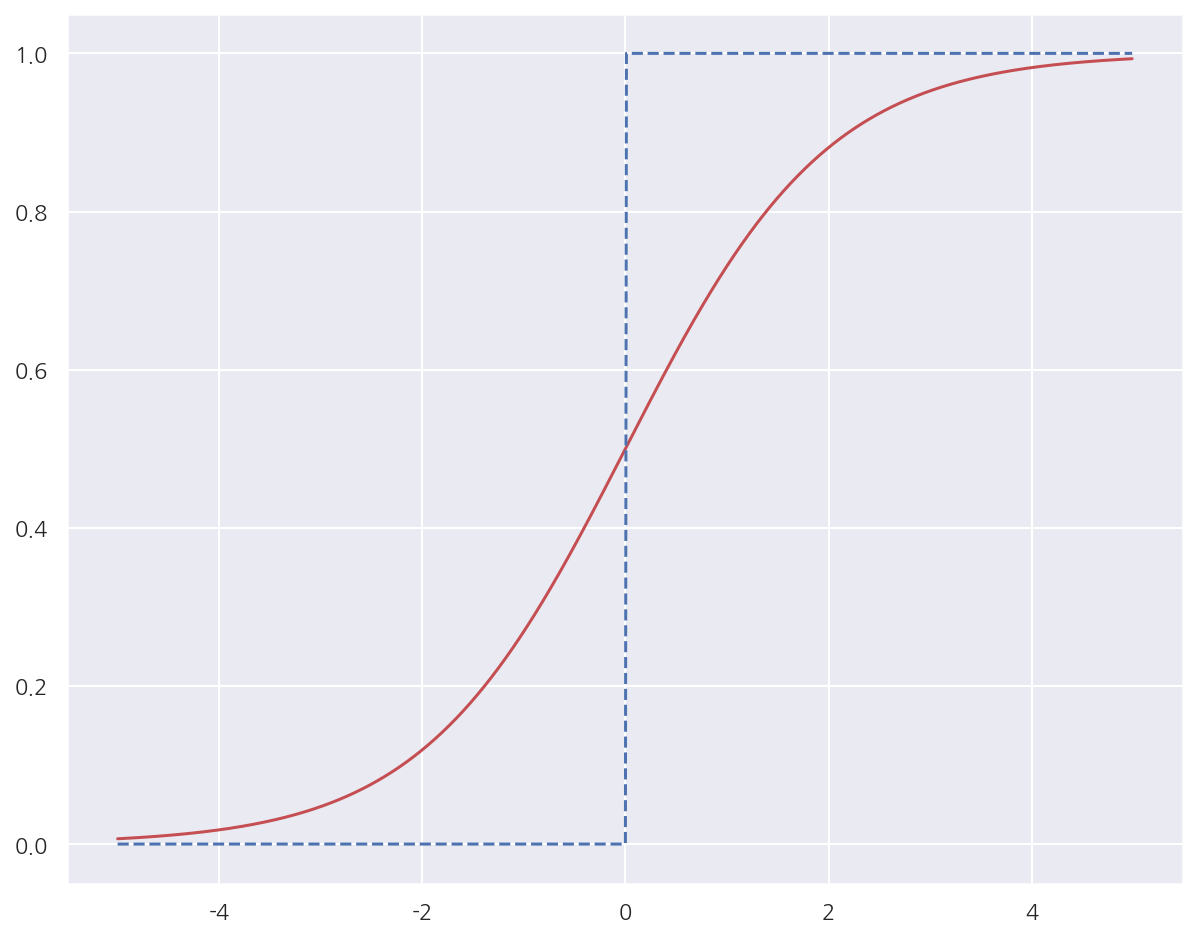

In [15]:
# 계단 함수와 시그모이드 함수
x = np.arange(-5.0, 5.0, 0.01)

y1 = sigmoid(x)
y2 = step_function_for_numpy(x)

plt.plot(x, y1, "r-")
plt.plot(x, y2, "b--")

plt.show()

### ReLU(Rectified Linear Unit)

가장 많이 쓰이는 함수 중 하나이다.
  
$ y = \begin{cases}
0 \quad (x \le 0) \\
x \quad (x > 0)
\end{cases} $

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

In [16]:
def ReLU(x):
    if x > 0:
        return x
    else:
        return 0

In [17]:
print(ReLU(5))
print(ReLU(-3))

5
0


### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function, tanh)

$y = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$

![](https://ww.namu.la/s/aeff20070260dc095f50d1ec74f1d4dd96bab65016ab1b01bed2145850e165e7c713734ff60047392c522e784bec9605782e4cacb2606725d782714917e2a4745eafc4cbd4e90a035b56b42d401bd0422d50baf9fbf550bef11f7e3c73e04411)

출처: https://namu.wiki/w/%EC%8C%8D%EA%B3%A1%EC%84%A0%20%ED%95%A8%EC%88%98

In [18]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [19]:
print(tanh(3))
print(tanh(-3))

0.9950547536867306
-0.9950547536867306


### Identity Function(항등 함수)

회귀(Regression) 문제에서 주로 주로 사용하며 마지막 출력층의 활성화 함수로 사용한다.

$y=x$

![](https://math.info/image/394/identity_function.jpg)

출처: https://math.info/Algebra/Identity_Function/

In [20]:
def identify_function(x):
    return x

In [21]:
print(identify_function(4))
print(identify_function(-1))

4
-1


### Softmax

다중 클래스 분류에 사용한다.

입력값의 영향을 크게 받아 입력값이 크면 출력값도 크다.

출력값은 확률에 대응 가능하다.

$y_k = \dfrac{exp(a_k)}{\sum_{i=1}{exp(a_i)}}$

![](https://miro.medium.com/max/1400/1*670CdxchunD-yAuUWdI7Bw.png)

출처: https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

In [22]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [23]:
a = np.array([0.3, 0.2, 4.0, -1.2])

print(softmax(a))
print(np.sum(softmax(a)))

[0.02348781 0.02125265 0.9500187  0.00524084]
1.0


- 출력값의 합은 1로서 각각의 출력값은 확률로 대응된다.

**소프트맥스 함수 주의점**

소프트맥스는 오버플로우(overflow) 문제가 발생할 수 있다.

지수 함수를 사용하기 때문에 입력값이 너무 크면 무한대(inf)가 반환된다.

이를 개선한 수식은 다음과 같다.

$y_k = \dfrac{exp(a_k)}{\sum_{i=1}{exp(a_i)}} = \dfrac{Cexp(a_k)}{C\sum_{i=1}{exp(a_i)}} \\
  \quad = \dfrac{exp(a_k + logC)}{\sum_{i=1}{exp(a_i + logC)}} \\
  \quad = \dfrac{exp(a_k + C')}{\sum_{i=1}{exp(a_i + C')}}
  $

In [24]:
A = np.array([1000, 900, 1050, 500])
print(softmax(A))

[nan nan nan  0.]


- 그냥 softmax를 사용하였을 때 입력값이 크니 nan값이 반환되었다.

In [25]:
def softmax(a):
    # C`값으로 최대값 사용 
    C = np.max(a)
    
    # 위 수식에서 C`은 로그값이니 모든 값이 가능하여 음수 값으로 제한
    return (np.exp(a - C)) / np.sum((np.exp(a - C)))

In [26]:
A = np.array([1000, 900, 1050, 500])
print(softmax(A))

[1.92874985e-022 7.17509597e-066 1.00000000e+000 1.37415257e-239]


- 개선한 수식을 적용하여 값이 잘 출력된다.

### 활성화 함수를 비선형 함수(non-linear function)로 사용하는 이유

신경망을 깊게(deep) 하기 위함이다.

만약 활성화 함수를 선형 함수로 설정하면 은닉층의 갯수가 여러개여도 의미가 없어진다.

예를 들어, $h(x) = cx$이고, 3개의 은닉층이 존재한다면,

$y = h(h(h(x))) = c*c*c*x = c^3x$ 이므로 결국에는 선형함수가 되어버린다.

### 그 외의 활성화 함수

**LeakyReLU**

$f_a(x) = \begin{cases}
x \quad (x \ge 0) \\
ax \quad (x < 0)
\end{cases}$

![](https://i0.wp.com/knowhowspot.com/wp-content/uploads/2019/04/IMG_20190406_220045-1.jpg)

출처: https://knowhowspot.com/technology/ai-and-machine-learning/artificial-neural-network-activation-function/

In [27]:
def LeakyReLU(x):
    a = 0.01
    
    return np.maximum(a*x, x)

In [28]:
x = np.array([0.5, -1.4, 3, 0, 5])
print(LeakyReLU(x))

[ 0.5   -0.014  3.     0.     5.   ]


**ELU(Exponential Linear Units)**

$f(\alpha, x) = \begin{cases}
\alpha \ (e^x - 1) \quad (x \le 0) \\
x \qquad \qquad (x > 0)
\end{cases}$

![](https://www.researchgate.net/publication/331794632/figure/fig1/AS:736888264609792@1552699261431/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function.jpg)

출처: https://www.researchgate.net/figure/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function_fig1_331794632

In [29]:
def ELU(x):
    alpha = 1.0
    
    # True면 1, False면 0인 성질을 이용해서 return
    return (x > 0) * x + (x <= 0) * alpha * (np.exp(x) - 1)

In [30]:
print(ELU(4))
print(ELU(-0.5))

4.0
-0.3934693402873666


### 활성화 함수 참고

**일반적인 사용 순서**

1. ELU


2. LeakyReLU


3. ReLU


4. tanh 


5. sigmoid 순으로 사용

**스탠포드 강의에서 언급한 사용 순서**

1. ReLU


2. ReLU Family(LeakyReLU, ELU)


3. sigmoid는 사용 X

## 3층 신경망 구현하기

다음과 같은 3층 신경망을 직접 구현해보자.

- 입력층(Input Layer): 3개의 뉴런


- 은닉층(Hidden Layers): 첫 번째 은닉층은 3개의 뉴런, 두 번째 은닉층은 2개의 뉴런


- 출력층(Output Layer): 2개의 뉴런(2개의 클래스)

![](http://ufldl.stanford.edu/tutorial/images/Network3322.png)

출처: http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/

### 활성화 함수 정의

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- 활성화 함수로는 시그모이드 함수를 사용한다.

### 레이어 정의

In [32]:
# input layer
x = np.array([1.0, 0.5, 0.4])

# weight
W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6], 
               [0.3, 0.5, 0.7]])

# bias
B1 = np.array([1,1,1])

print(W1.shape)
print(x.shape)
print(B1.shape)

A1 = np.dot(x,W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3, 3)
(3,)
(3,)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


- input layer로 3개의 값을 받아 3개의 결과를 출력한다.

In [33]:
# hidden layer 1
# weight
W2 = np.array([[0.2, 0.4, 0.6], 
               [0.1, 0.3, 0.5], 
               [0.4, 0.6, 0.8]])

# bias
B2 = np.array([1,1,1])

print(W2.shape)
print(B2.shape)

A2 = np.dot(A1,W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3, 3)
(3,)
[2.266 3.286 4.306]
[0.90602176 0.96394539 0.9866921 ]


- 첫 번째 hidden layer로 input layer에서 출력된 3개의 값을 받아 3개의 결과를 출력한다.

In [34]:
# hidden layer 2
# weight
W3 = np.array([[0.1, 0.3], 
               [-0.1, -0.5], 
               [0.3, 0.5]])

# bias
B3 = np.array([1,1])

print(W3.shape)
print(B3.shape)

A3 = np.dot(A2,W3) + B3
Z3 = sigmoid(A3)

print(A3)
print(Z3)

(3, 2)
(2,)
[2.1898 2.1898]
[0.8993298 0.8993298]


- 두 번째 hidden layer로 앞선 단계에서 출력된 3개의 값을 받아 2개의 결과를 출력한다.

In [35]:
# output layer
# weight
W4 = np.array([[0.1, 0.2], 
               [0.3, 0.5]])

# bias
B4 = np.array([1,1])

print(W4.shape)
print(B4.shape)

A4 = np.dot(A3,W4) + B4
Z4 = sigmoid(A4)

print(A4)
print(Z4)

(2, 2)
(2,)
[1.87592 2.53286]
[0.86714179 0.92641356]


- output layer로 앞선 단계에서 출력된 2개의 값을 받아 최종 2개의 결과를 출력한다.

In [36]:
# 3층 신경망
def network():
    network = {}
    
    # 첫 번째 레이어
    network["W1"] = np.array([[0.1, 0.3, 0.5], 
                              [0.2, 0.4, 0.6], 
                              [0.3, 0.5, 0.7]])
    
    network["B1"] = np.array([1,1,1])
    
    # 두 번째 레이어
    network["W2"] = np.array([[0.2, 0.4, 0.6], 
                              [0.1, 0.3, 0.5], 
                              [0.4, 0.6, 0.8]])
    
    network["B2"] = np.array([1,1,1])
    
    
    # 세 번째 레이어
    network["W3"] = np.array([[0.1, 0.3], 
                              [-0.1, -0.5], 
                              [0.3, 0.5]])
    
    network["B3"] = np.array([1,1])
    
    # 네 번째 레이어
    # weight
    network["W4"] = np.array([[0.1, 0.2], 
                              [0.3, 0.5]])
    
    network["B4"] = np.array([1,1])
    
    return network

In [37]:
def forward(network, x):
    W1, W2, W3, W4 = network["W1"], network["W2"], network["W3"], network["W4"]
    B1, B2, B3, B4 = network["B1"], network["B2"], network["B3"], network["B4"]
    
    A1 = np.dot(x,W1) + B1
    Z1 = sigmoid(A1)
    
    A2 = np.dot(Z1,W2) + B2
    Z2 = sigmoid(A2)
    
    A3 = np.dot(Z2,W3) + B3
    Z3 = sigmoid(A3)
    
    A4 = np.dot(Z3,W4) + B4
    y = sigmoid(A4)
    
    return y

- 앞서 실행한 3층 신경망의 각 단계를 합쳐서 함수로 정의하였다.

### 신경망 추론 실행

In [38]:
net = network()

x = np.array([0.3, 1.3, -2.2])
y = forward(net, x)

print(y)

[0.78781193 0.82428264]
